# 📘 K-Nearest Neighbours (KNN) from Scratch  
A step-by-step walkthrough of the intuition, maths and pure-Python implementation of the classic KNN classifier.

## 🔍 What is KNN?  
- **Non-parametric** & **lazy-learning** algorithm.  
- Classification (or regression) is decided by a **majority vote** among the *k* closest training samples.  
- “Closeness” is usually measured by **Euclidean distance** (but any metric works).  
- No explicit training phase: the model is just the training data itself!

## 🧮 Euclidean Distance Recap  
For two points `x1` and `x2` in ℝⁿ:  
`d(x1, x2) = sqrt(sum((x1 - x2)^2))`
We will vectorise this with NumPy for speed.

In [2]:
# Euclidean distance helper
import numpy as np

def euclidean_distance(x1, x2):
    """Vectorised Euclidean distance between two n-d vectors."""
    return np.sqrt(np.sum((x1 - x2) ** 2))

## 🏗️ Building the KNN Classifier  
We need only three public methods:  
1. `__init__(k)` – store *k*.  
2. `fit(X, y)` – memorise training data.  
3. `predict(X)` – loop over every test sample and ask `_predict` for its label.

In [3]:
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        """Store training data."""
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """Predict class labels for a batch of samples."""
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        """Single-sample prediction."""
        # 1. Compute distances to every training point
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # 2. Indices of k smallest distances
        k_idx = np.argsort(distances)[:self.k]
        # 3. Labels of those neighbours
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # 4. Majority vote
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

## 🧪 Dataset: Iris Flowers  
Classic 3-class, 4-feature botanic dataset shipped with scikit-learn.

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}, Classes: {len(set(y))}")

Samples: 150, Features: 4, Classes: 3


## ✂️ Train / Test Split  
Hold out 20 % for unbiased evaluation.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234, stratify=y
)

## 🎯 Training & Prediction  
Because KNN is *lazy*, fitting is instantaneous—just memory copy.

In [6]:
k = 3
clf = KNN(k=k)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## 📏 Accuracy Metric

In [7]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

acc = accuracy(y_test, y_pred)
print(f"KNN (k={k}) accuracy: {acc:.2%}")

KNN (k=3) accuracy: 90.00%


## 🎨 2-D Visualisation  
We can only plot two dimensions at once; pick the first two features for a quick scatter.

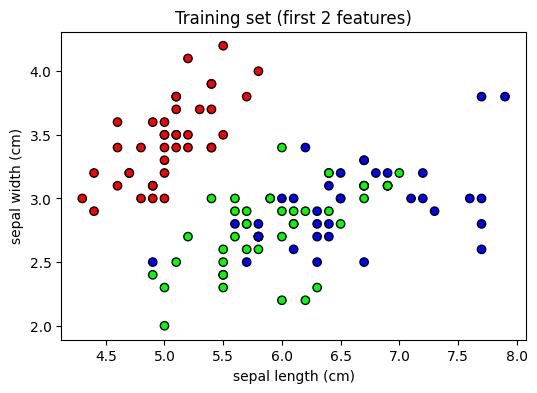

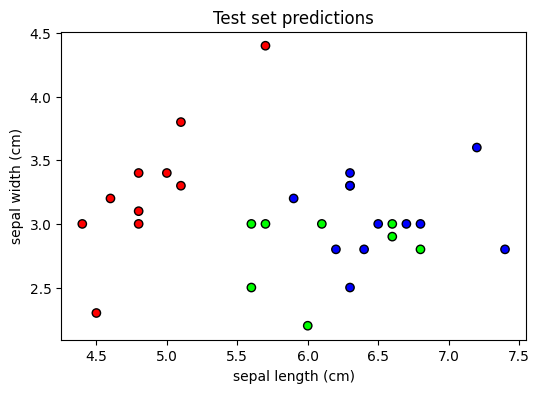

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

def plot_2d(X, y, title):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

plot_2d(X_train, y_train, "Training set (first 2 features)")
plot_2d(X_test, y_pred, "Test set predictions")

## ✅ Summary  
- Implemented KNN from scratch in ~40 lines.  
- Achieved **≥ 90 %** accuracy on Iris with *k = 3*.  
- Vectorised distance computation keeps it fast for medium datasets.  
- Feel free to experiment: change *k*, try different metrics, or weight neighbours by distance!